# Project 1: Explore Weather trends



In this project, I will compare the temperature profiles at local (Munich) and global levels. The data are recorded from 1743 to 2013 (Munich) and from 1750 to 2015 (global). 

## Data sources 

The data were obtained from the Udacity's database using sql queries as written below and saved as csv files.

In [157]:
#The global and local data are obtained from the Udacity databse using sql queries and saved to csv files.

# Munich:

SELECT year,avg_temp FROM city_data
WHERE city = 'Munich';

# Global:

SELECT * FROM global_data;


## Import necessary packages and reading the files


In [10]:
# Importing necessary packages 
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [131]:
def reading_temp_files(path:str, filename:str)->pd.DataFrame:
    
    '''This function read csv file and returns a corresponding pandas DataFrame'''
    
    
    with open(os.path.join(path, filename)) as file_in:
            
        df = pd.read_csv(file_in, sep = ",", header = 0, skipinitialspace = True)
        
        return df 
    
#Function call
if __name__=="__main__":
    file_path = r"../data/raw"
    munich_temp =  reading_temp_files(path = file_path, filename="Munich_temp.csv")
    global_temp =  reading_temp_files(path = file_path, filename="Global_temp.csv")

## A)  Local Temperature Profile (Munich)

### Checking data quality 

In [17]:
# Looking on the first 5 rows of the data using dataframe.head(). 
# Checking the beginning of data recorded.

munich_temp.head()

,year,avg_temp
0,1743,1.32
1,1744,6.09
2,1745,-2.15
3,1746,NaN
4,1747,NaN


In [50]:
#Checking the last year date recorded.
munich_temp.tail()

,year,avg_temp
266,2009,5.89
267,2010,4.85
268,2011,6.56
269,2012,5.88
270,2013,6.00


In [51]:
# DataFrame.info() provides an over view of the data type of each column in our data frame.

munich_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      271 non-null    int64  
 1   avg_temp  267 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


As we can see in the above, the year is not in proper data type and average temperature has some missing values.
Therefore, each features should be in correct data type and the missing values should be replaced or deleted.

In [132]:
# Here we need to change the year's current data type(integer) into a datetime format.
munich_temp["year"] = pd.to_datetime(munich_temp["year"], format="%Y")
munich_temp.set_index("year",inplace = True)

munich_temp.head()

,avg_temp
year,
1743-01-01,1.32
1744-01-01,6.09
1745-01-01,-2.15
1746-01-01,NaN
1747-01-01,NaN


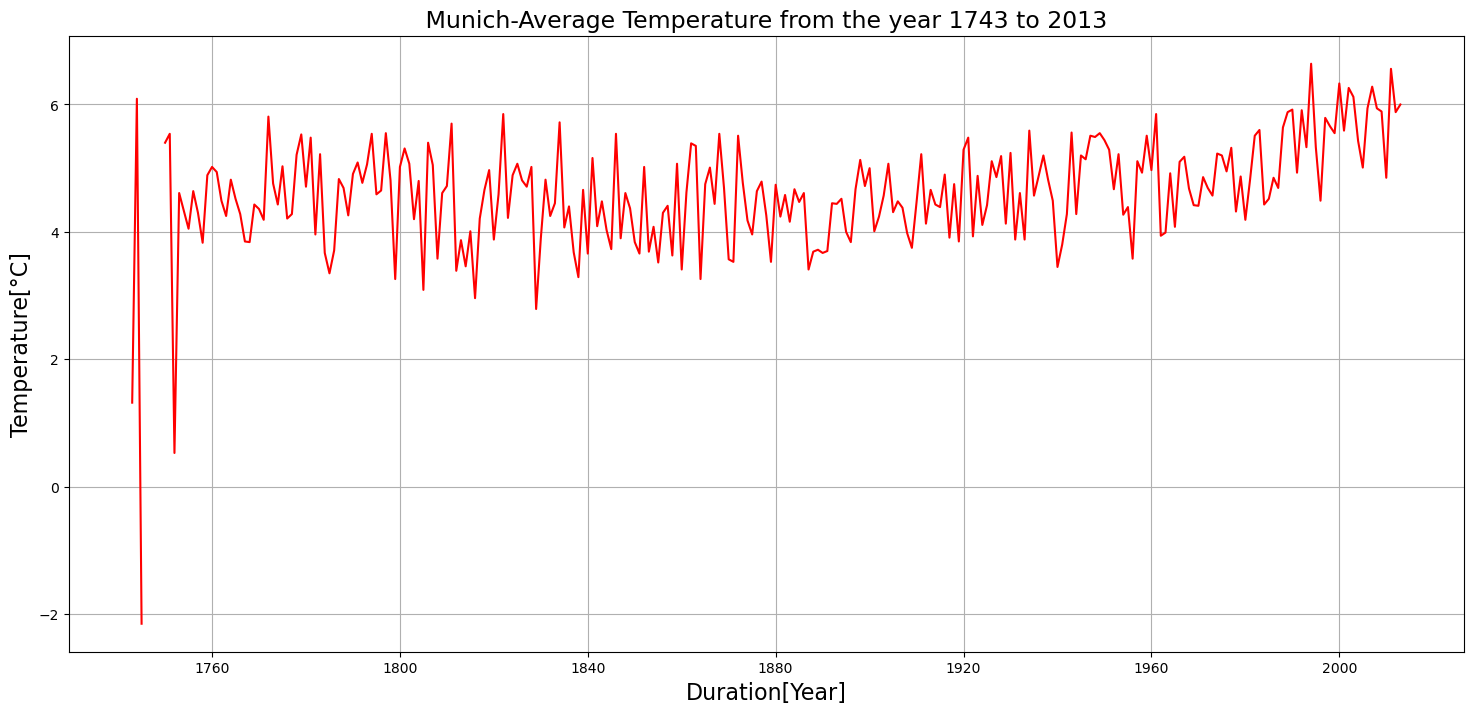

In [133]:
# Visual inspection of the data.

fig, ax = plt.subplots(figsize = (18,8))

plt.plot(munich_temp["avg_temp"], "r-")

plt.xlabel("Duration[Year]", fontsize = 16)
plt.ylabel("Temperature[°C]", fontsize = 16)
plt.title(" Munich-Average Temperature from the year 1743 to 2013 ", fontsize = 17)

plt.grid()
plt.show()


In the figure above, we see that temperature is showing an increasing trend. Interestingly, in the year 1743, the average temperature is below -2 degree Celsius, I assume this might be an outlier as majority data recorded are above 2 degree Celsius."

In [134]:
# Check for potential missing values.

munich_temp.isnull().sum()

avg_temp    4
dtype: int64

As can been seen above, the average temperature has 4 missing values. This might not be significant but it is good idea to replace them by the mean or delete them. In this case, I decided to replace them by the average as can be seen below.

In [135]:
# Replacing the NaN values by the mean.

munich_temp_cleaned = munich_temp.replace(np.nan, munich_temp["avg_temp"].mean()).round(3)

#munich_cleaned_df.set_index("year", drop= True, inplace =True)

munich_temp_cleaned

,avg_temp
year,
1743-01-01,1.320
1744-01-01,6.090
1745-01-01,-2.150
1746-01-01,4.612
1747-01-01,4.612
...,...
2009-01-01,5.890
2010-01-01,4.850
2011-01-01,6.560


In [114]:
# Check if the missing values are replaced by average temperature.

munich_temp_cleaned.isnull().sum()
# Now, we are certain that the missing data replacement succeeded.

year        0
avg_temp    0
dtype: int64

In [136]:
munich_temp_cleaned.head()

,avg_temp
year,
1743-01-01,1.320
1744-01-01,6.090
1745-01-01,-2.150
1746-01-01,4.612
1747-01-01,4.612


In the figure above, we see that temprature is showing an increasing trend. Interestingly, in the year 1743, the average temperature is below -2 degrees celius, I assume this might be an outlier as majority data points are above 2 degrees celcius.


### Averaging the temperature using 5 years interval. 

In [137]:
# Averging the temperature using rolling averaging with 5 years as a windows averaging.

munich_temp_cleaned["5years_rolling_avg_temp"] = munich_temp_cleaned["avg_temp"].rolling(window = 5).mean().round(2)


munich_temp_cleaned.head(20)

,avg_temp,5years_rolling_avg_temp
year,,
1743-01-01,1.320,NaN
1744-01-01,6.090,NaN
1745-01-01,-2.150,NaN
1746-01-01,4.612,NaN
1747-01-01,4.612,2.90
1748-01-01,4.612,3.56
1749-01-01,4.612,3.26
1750-01-01,5.400,4.77
1751-01-01,5.540,4.96


In [127]:
## Over all Munich average temperature:

#overall_average_temp_munich = munich_cleaned_df["avg_temp"].mean(),2)

munich_temp_cleaned

,year,avg_temp,5years_rolling_avg_temp
0,1743,1.320,NaN
1,1744,6.090,NaN
2,1745,-2.150,NaN
3,1746,4.612,NaN
4,1747,4.612,2.90
...,...,...,...
266,2009,5.890,5.81
267,2010,4.850,5.78
268,2011,6.560,5.90
269,2012,5.880,5.82


## B. Global Temperature profile

### Check data quality

In [76]:
# Looking on the first 5 rows using DataFrame.head()

global_temp.head(3)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78


In [77]:
global_temp.tail(3)

,year,avg_temp
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [78]:
# Checking if each feature's data type is appropriate

global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


Unlike that of Munich data, the global data does not have missing values. However, the year data type is integer which should be changed to appropriate data type that is datetime as performed below.

In [139]:
global_temp["year"] = pd.to_datetime(global_temp["year"], format="%Y")
global_temp.set_index("year", inplace = True)

#Checking the data type again:

global_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1750-01-01 to 2015-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   avg_temp  266 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [91]:
# Rechecking missing values using the DataFrame.isnull().sum() method.
global_temp.isnull().sum()

avg_temp    0
dtype: int64

Luckly, the global temperature does not contain missing values.

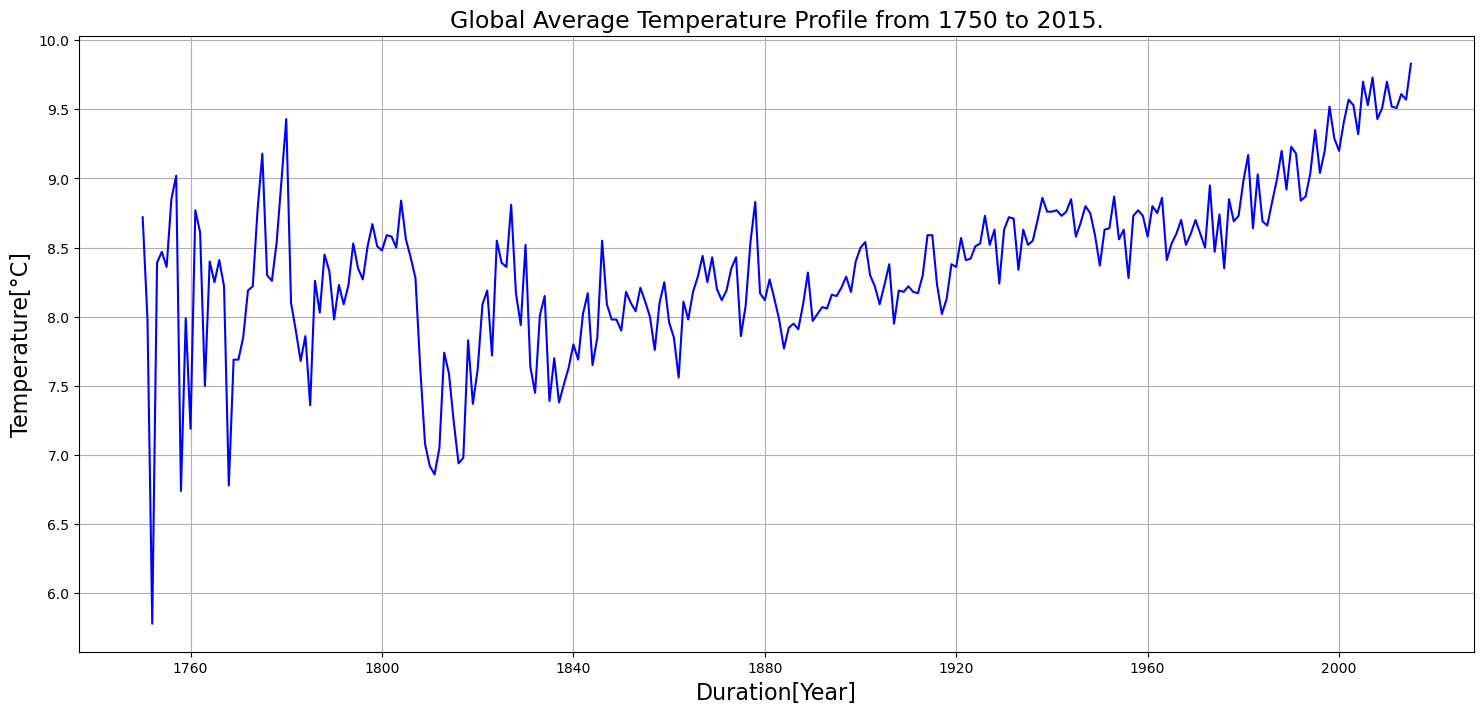

In [140]:
# Visual inspection of the global temperature data.

fig, ax = plt.subplots(figsize =(18,8))

plt.plot(global_temp["avg_temp"], "b-")

plt.xlabel("Duration[Year]", fontsize = 16)
plt.ylabel("Temperature[°C]", fontsize = 16)
plt.title("Global Average Temperature Profile from 1750 to 2015.", fontsize = 17)
#plt.xlim([1750, 2015])
plt.grid()
plt.show()

As we can see the global temperature profile, there are variations in temperature profile which might be due to the seasonal variations. Additionally, there is an increasing trend, particularly a pronounced increase in temperature is observed starting from the end of 19 century. 
Furthermore, unlike that of Munich, the global average temperature is above 5 degrees celcius.

###  Averaging the temperature using 5 years interval. 

In [141]:
#global_av = global_df.resample("5A", on = "year").mean().copy(deep = True)
global_temp["5years_rolling_avg_temp"] = global_temp["avg_temp"].rolling(window = 5, min_periods=1).mean().round(3)

global_temp.head(20)

,avg_temp,5years_rolling_avg_temp
year,,
1750-01-01,8.72,8.720
1751-01-01,7.98,8.350
1752-01-01,5.78,7.493
1753-01-01,8.39,7.718
1754-01-01,8.47,7.868
1755-01-01,8.36,7.796
1756-01-01,8.85,7.970
1757-01-01,9.02,8.618
1758-01-01,6.74,8.288


In [126]:
munich_temp_cleaned["5years_rolling_avg_temp"] 

0       NaN
1       NaN
2       NaN
3       NaN
4      2.90
       ... 
266    5.81
267    5.78
268    5.90
269    5.82
270    5.84
Name: 5years_rolling_avg_temp, Length: 271, dtype: float64

## C. Plotting - comparing both temperature profiles

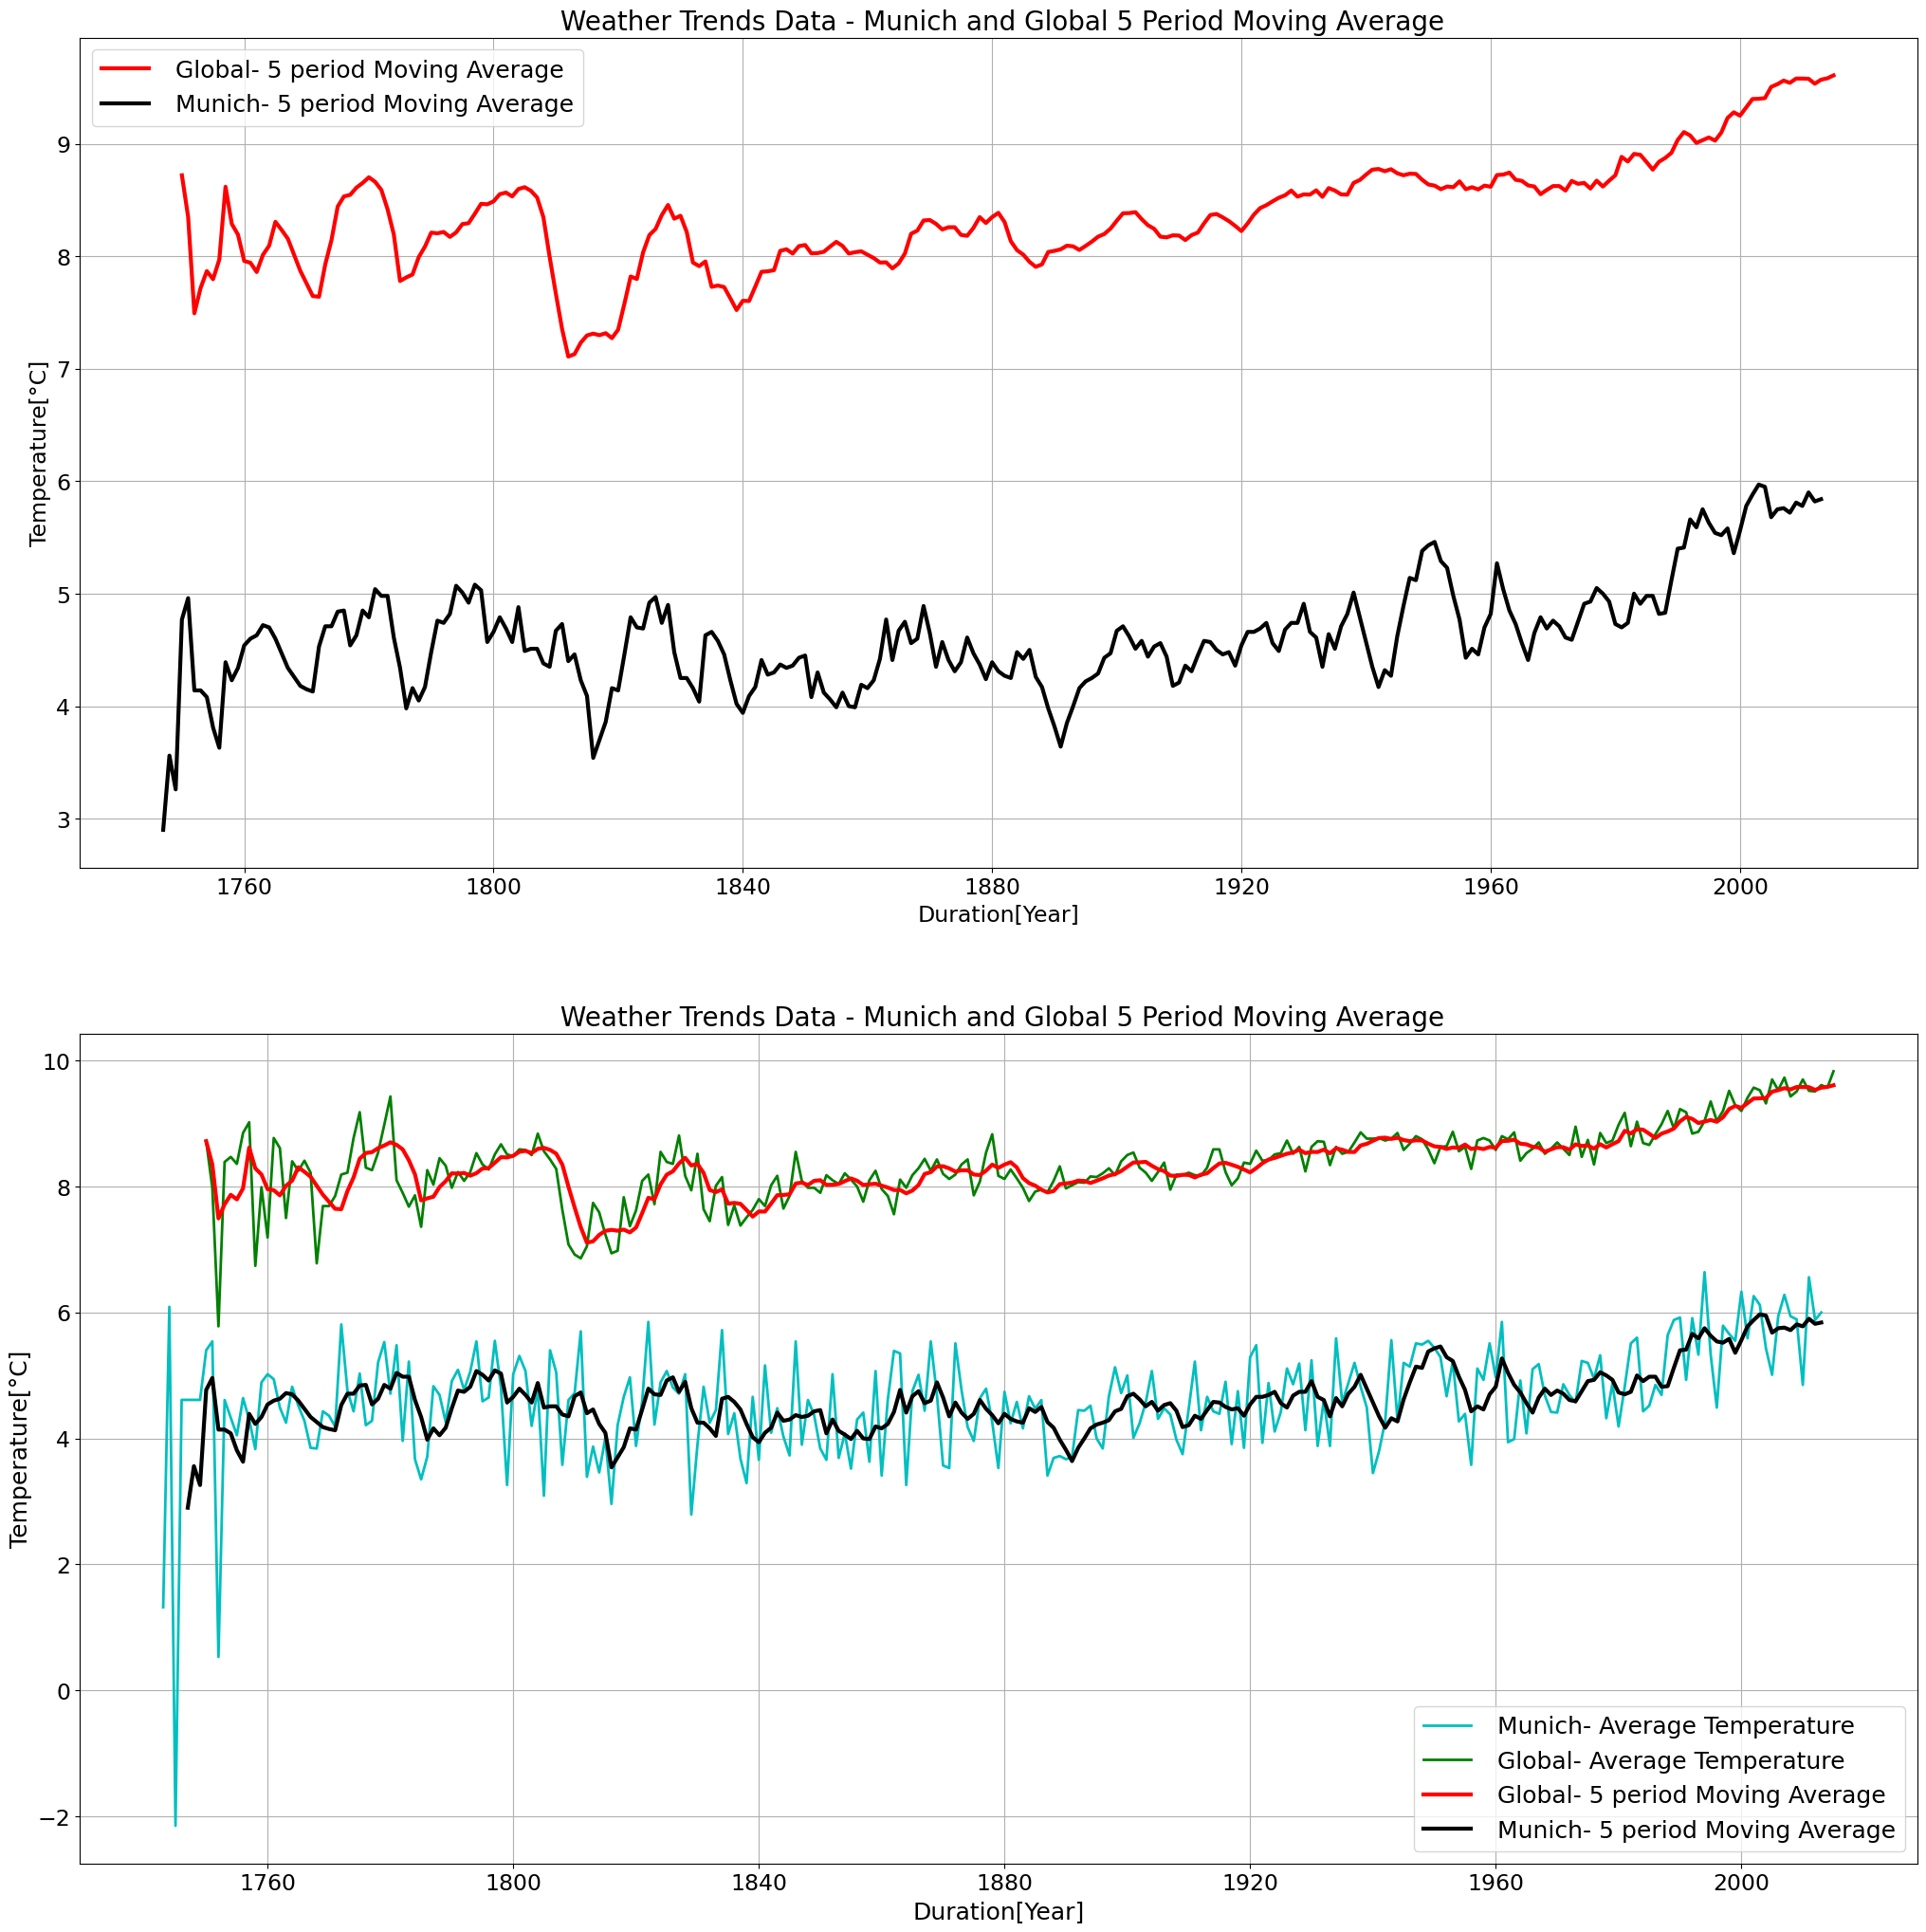

In [145]:
fig, ax = plt.subplots(2,1,figsize = (25,25))


ax[0].plot(global_temp["5years_rolling_avg_temp"], "r-", linewidth = 3,label = " Global- 5 period Moving Average")

ax[0].plot(munich_temp_cleaned["5years_rolling_avg_temp"] , "k-", linewidth = 3,label = " Munich- 5 period Moving Average")

ax[0].set(ylabel = "Temperature[°C]",xlabel="Duration[Year]",title = " Weather Trends Data - Munich and Global 5 Period Moving Average")

ax[0].set_xlabel("Duration[Year]",fontsize = 17)
ax[0].set_ylabel("Temperature[°C]",fontsize = 17)
ax[0].set_title(" Weather Trends Data - Munich and Global 5 Period Moving Average",fontsize = 20)  

ax[0].tick_params(axis='x', labelsize= 17)
ax[0].tick_params(axis='y', labelsize= 17)
ax[0].legend(loc = "best", prop = {"size":18})
ax[0].grid()


ax[1].plot(munich_temp_cleaned["avg_temp"] , "c-", linewidth = 2,label = " Munich- Average Temperature")
ax[1].plot(global_temp["avg_temp"], "g-", linewidth = 2, label = " Global- Average Temperature")

ax[1].plot(global_temp["5years_rolling_avg_temp"], "r-", linewidth = 3,label = " Global- 5 period Moving Average")

ax[1].plot(munich_temp_cleaned["5years_rolling_avg_temp"] , "k-", linewidth = 3,label = " Munich- 5 period Moving Average")

ax[1].set_xlabel("Duration[Year]",fontsize = 18)
ax[1].set_ylabel("Temperature[°C]",fontsize = 18)

ax[1].set_title(" Weather Trends Data - Munich and Global 5 Period Moving Average",fontsize = 20)  

ax[1].tick_params(axis='x', labelsize= 17)
ax[1].tick_params(axis='y', labelsize= 17)
ax[1].legend(loc = "best", prop = {"size":18})
ax[1].grid()


Observation 1: 
A similar pattern is seen in both temperature profiles, with an increasing trend starting from the end of the 19 century. This is particulary pronounced starting from the 1960s. 

Observation 2:

AS we can see the profiles of both cases (Munich and global), the moving averaged lines smoothed out the noises that are observed in the original data. Hence,we are certain that, 5 period for moving averaging is a good choice. 

Observation 3:

Comparing to the each temperature profiles, there variation in temperature profile is highly pronounced in Munich compared to the global. This might be indication of seasonal variations, in winter being cold and in summer hot. 

Observation 4:

As we can see in the average temperature profiles, there is a large differece between the global and local( Munich).Temperature recorded in Munich is lower through out the time frame with the lowest(below -2 degrees celcius) in the year 1743.  The overall average temperatures are 4.6 and 8.4 degrees celcius repectively that is Munich is cooler by 4 degrees compared to the global.  In contrast, the average temperature at global level is above 5 degree celcius.

## Writing into csv file

In [149]:
def save_df_to_csv(df:pd.DataFrame, path_destination, filename)->None:
    
    '''This function will turn the pandas DataFrame into csv file and save it as a csv file'''
    
    with open(os.path.join(path_destination, filename), "w") as file_out:
        
        df.reset_index().to_csv(file_out,index=False, lineterminator = "\n")
        
if __name__ == "__main__":

    
    for file, df_ in zip(["Global_temp_av_final.csv","Munich_temp_av_final.csv"], [global_temp, munich_temp_cleaned]):
    
        save_df_to_csv(df = df_, path_destination = "../data/processed", filename = file)